![](https://i.imgur.com/nI0usXG.jpg)

In today's digital age, e-commerce has become an important weapon in business development. The use of the Internet and digital technology has opened up a new world of potential and opportunities for businesses, especially in the commercial and retail sectors. From online sales to online advertising and marketing, e-commerce has changed the way we reach and interact with customers.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline
import plotly.offline as pyoff
import plotly.graph_objs as go
from datetime import datetime

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')

### Exploratory Data Analysis (EDA)
So now we will go through an exploratory data analysis to get insights from E-Commerce in Brazil. The aim here is to divide this session into topics so we can explore graphics for each subject (orders, customers, products, items,...).

#### I. Total Orders on E-Commerce
We know that e-commerce is really a growing trend in a global perspective. Let's dive into the orders dataset to see how this trend can be presented in Brazil, at least on the dataset range.

##### How many orders we have for each status?

In [4]:
order_count = orders.groupby(['order_status'])['order_id'].count().reset_index()
order_count

,order_status,order_id
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


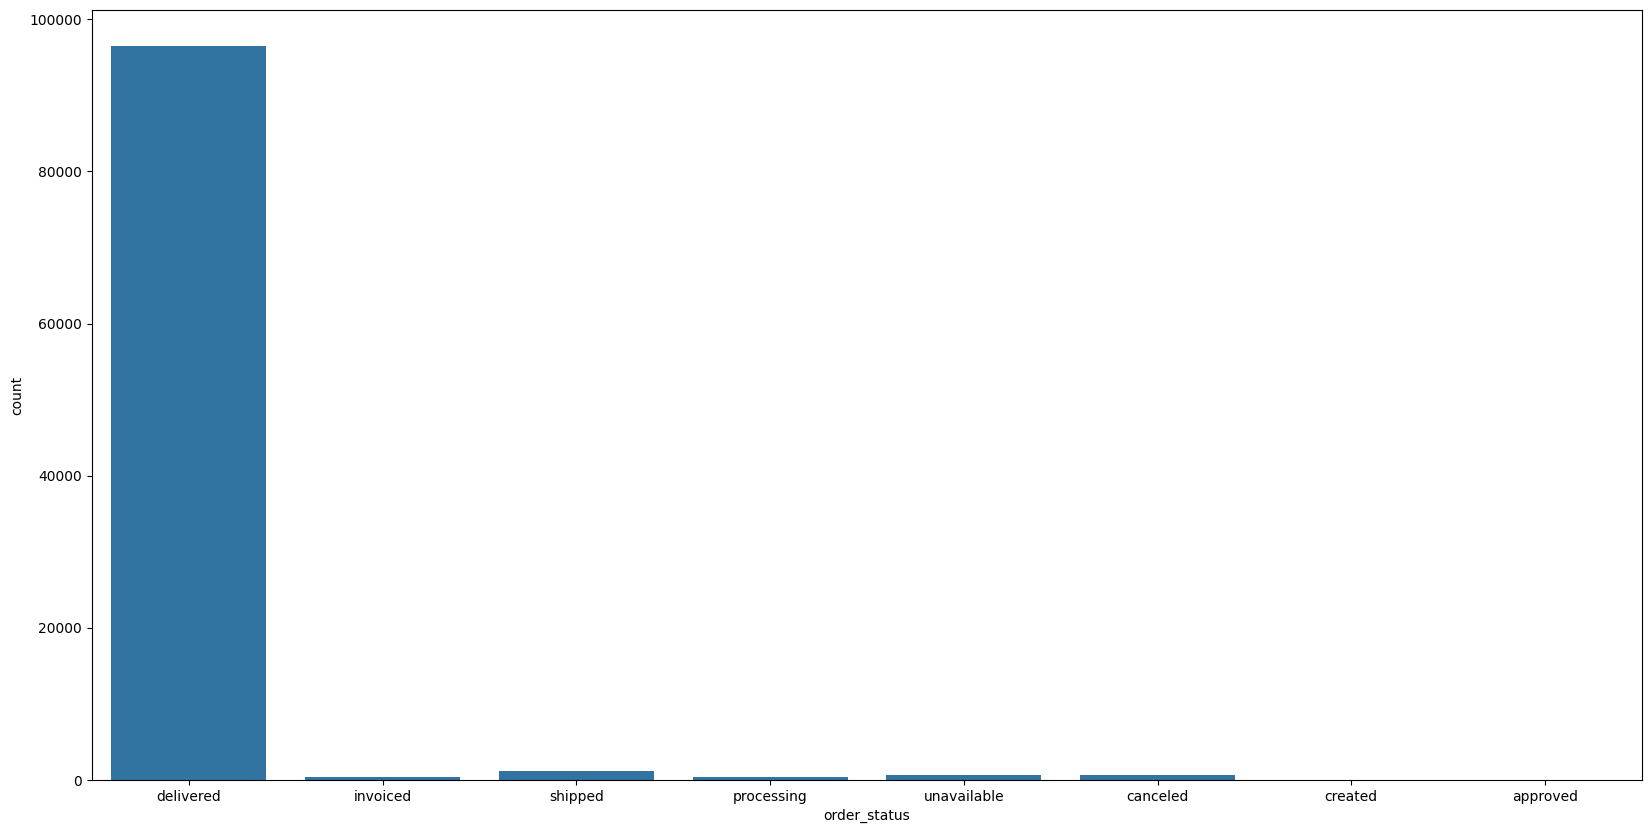

In [5]:
plt.figure(figsize = (20, 10))
sns.countplot(data = orders, x = 'order_status');

The highest amount of orders went from delivered ones with 96478 orders (97%).

##### Is that a growing trend on e-commerce in Brazil?

In [6]:
# Combine customers dataset and orders dataset
customer_order = customers.merge(orders)
customer_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [7]:
def func(x):
    if (x >= 1) and (x <= 5):
        return 'Dawn'
    elif (x >= 6) and (x <= 12):
        return 'Morning'
    elif (x >= 13) and (x <= 18):
        return 'Afternoon'
    else:
        return 'Night'

In [8]:
# Transform timestamp columns
customer_order['order_purchase_timestamp'] = pd.to_datetime(customer_order['order_purchase_timestamp'])
# Extract time attributes from these datetime columns (year, month, day, day of week, hour)
customer_order['order_purchase_year_month'] = customer_order['order_purchase_timestamp'].map(lambda x: 100*x.year + x.month)
customer_order['order_purchase_year'] = customer_order['order_purchase_timestamp'].map(lambda x: x.year)
customer_order['order_purchase_month'] = customer_order['order_purchase_timestamp'].map(lambda x: x.month)
customer_order['order_purchase_month_name'] = customer_order['order_purchase_month'].apply(lambda x: calendar.month_abbr[x])
customer_order['order_purchase_date'] = customer_order['order_purchase_timestamp'].map(lambda x: 10000*x.year + 100*x.month + x.day)
customer_order['order_purchase_day'] = customer_order['order_purchase_timestamp'].map(lambda x: x.day)
customer_order['order_purchase_dayofweek'] = customer_order['order_purchase_timestamp'].map(lambda x: datetime.weekday(x))
customer_order['order_purchase_dayofweek_name'] = customer_order['order_purchase_dayofweek'].map(lambda x: calendar.day_abbr[x])
customer_order['order_purchase_hour'] = customer_order['order_purchase_timestamp'].map(lambda x: x.hour)
customer_order['order_purchase_time_day'] = customer_order['order_purchase_hour'].apply(func)
customer_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year_month,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,201705,2017,5,May,20170516,16,1,Tue,15,Afternoon
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,201801,2018,1,Jan,20180112,12,4,Fri,20,Night
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,201805,2018,5,May,20180519,19,5,Sat,16,Afternoon
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,201803,2018,3,Mar,20180313,13,1,Tue,16,Afternoon
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,201807,2018,7,Jul,20180729,29,6,Sun,9,Morning


In [9]:
order_year_month = customer_order.groupby(['order_purchase_year_month'])['order_id'].count().reset_index()
order_year_month.head()

,order_purchase_year_month,order_id
0,201609,4
1,201610,324
2,201612,1
3,201701,800
4,201702,1780


##### Is there any growing trend on brazilian e-commerce?

In [10]:
plt.figure(figsize = (10, 5))
lineplot = [
    go.Scatter(
        x = order_year_month.query('order_purchase_year_month < 201809')['order_purchase_year_month'],
        y = order_year_month.query('order_purchase_year_month < 201809')['order_id'],
        mode = 'lines+markers')
]
layout = go.Layout(
    xaxis = {'type' : 'category'},
    title = 'Total Orders in Brazil per Month'
)
fig = go.Figure(data = lineplot, layout = layout)
pyoff.iplot(fig);

<Figure size 1000x500 with 0 Axes>

From the above chart, we can conclude that online shopping has increased over time. Although there have been some fluctuations in purchase volume within a few months, overall, consumers tend to buy more and more things online.

##### On what day of week customers tend to do online shopping?

In [12]:
order_day_of_week = customer_order.groupby(['order_purchase_dayofweek_name'])['order_id'].count().reset_index()
order_day_of_week.head()

,order_purchase_dayofweek_name,order_id
0,Fri,14122
1,Mon,16196
2,Sat,10887
3,Sun,11960
4,Thu,14761


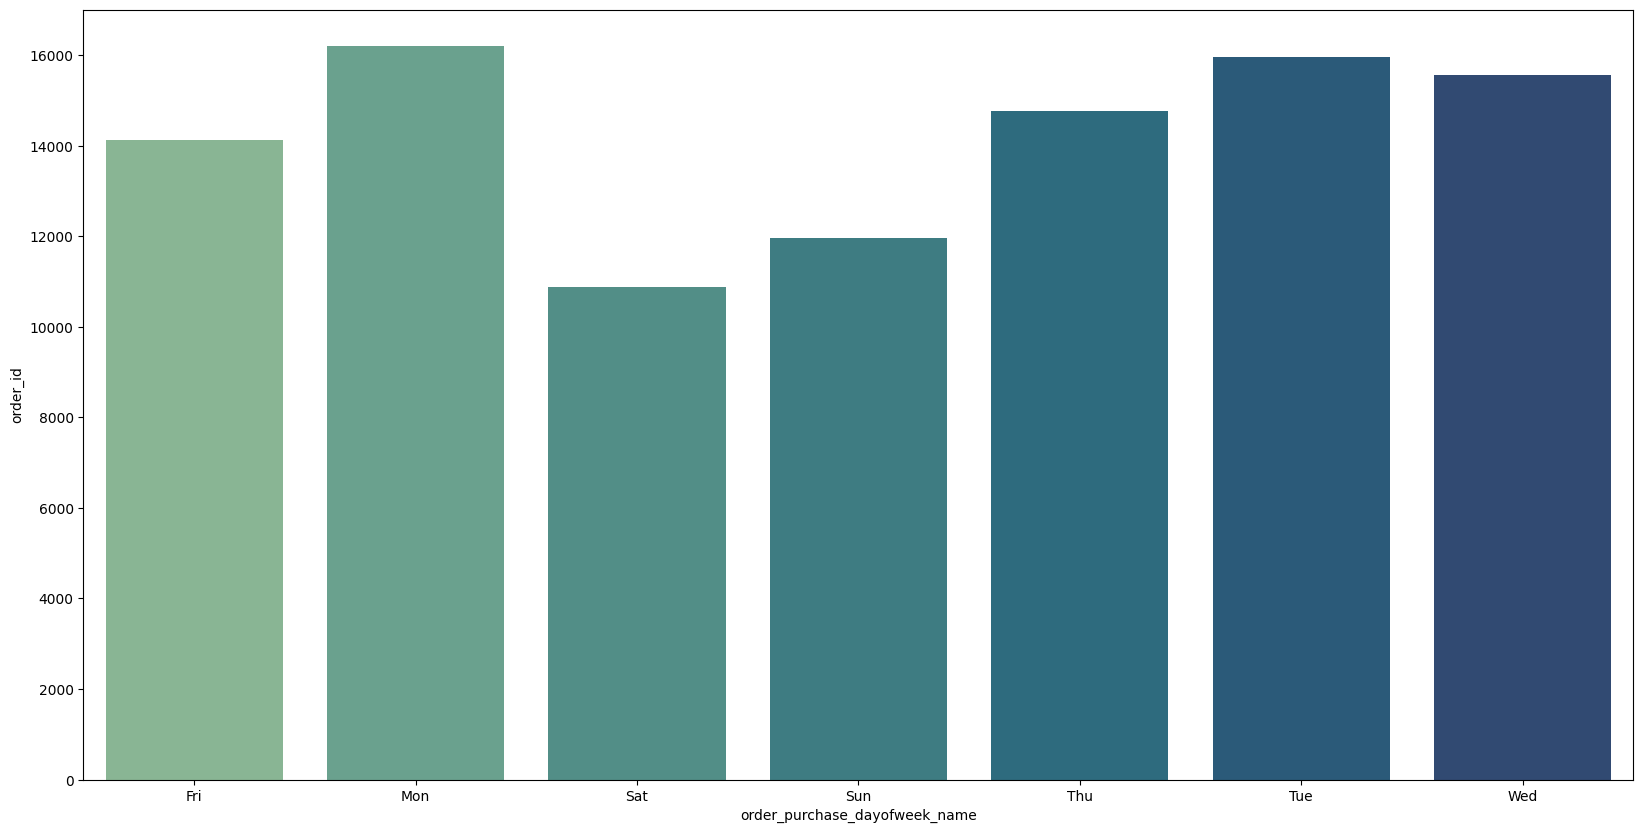

In [13]:
plt.figure(figsize = (20, 10))
sns.barplot(data = order_day_of_week, x = 'order_purchase_dayofweek_name', y = 'order_id', palette = 'crest');


Consumers often shop at the beginning of the week, with Monday being the day most consumers buy online. The reason is because they want to complete orders before the weekend.

##### What time customers tend to buy (Dawn, Morning, Afternoon, Night)?

In [15]:
order_time_of_day = customer_order.groupby(['order_purchase_time_day'])['order_id'].count().reset_index()
order_time_of_day

,order_purchase_time_day,order_id
0,Afternoon,38135
1,Dawn,2346
2,Morning,28235
3,Night,30725


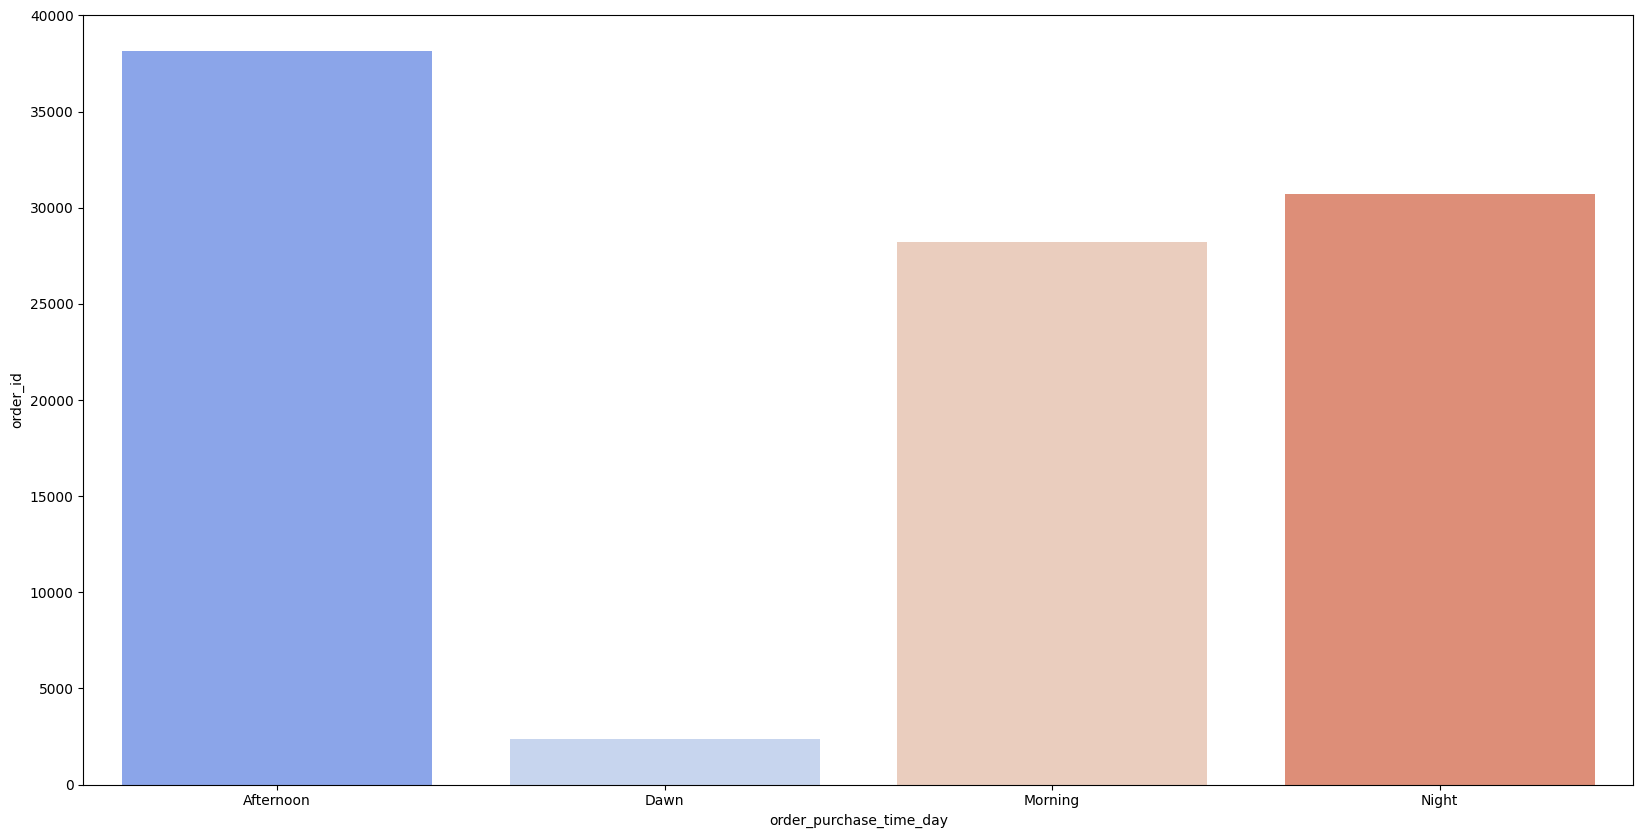

In [16]:
plt.figure(figsize = (20,10))
sns.barplot(data = order_time_of_day, x = 'order_purchase_time_day', y = 'order_id', palette = 'coolwarm');

From the above chart, it can be seen that Brazilian consumers shop online the most during noon and evening, especially between 12:00 to 13:00 and 20:00 to 22:00. In addition, there is a time period between 7 and 9 o'clock. The reason for this behavior is that most consumers use their phones for shopping during lunch breaks and before bedtime.

##### Comparison between 2017 and 2018

We have a sharp decrease between August 2018 and September 2018 and maybe the origin of that is related to noise on data. For further comparison between 2017 and 2018, let's just consider orders between January and August in both years.

In [17]:
orders_2017 = order_year_month[(order_year_month['order_purchase_year_month'] > 201612) & (order_year_month['order_purchase_year_month'] < 201709)].reset_index()
orders_2017

,index,order_purchase_year_month,order_id
0,3,201701,800
1,4,201702,1780
2,5,201703,2682
3,6,201704,2404
4,7,201705,3700
5,8,201706,3245
6,9,201707,4026
7,10,201708,4331


In [18]:
orders_2018 = order_year_month[(order_year_month['order_purchase_year_month'] > 201712) & (order_year_month['order_purchase_year_month'] < 201809)].reset_index()
orders_2018

,index,order_purchase_year_month,order_id
0,15,201801,7269
1,16,201802,6728
2,17,201803,7211
3,18,201804,6939
4,19,201805,6873
5,20,201806,6167
6,21,201807,6292
7,22,201808,6512


In [19]:
number_of_orders_2017 = orders_2017['order_id'].sum()
number_of_orders_2018 = orders_2018['order_id'].sum()

In [20]:
groupbar = customer_order.groupby(['order_purchase_year', 'order_purchase_year_month', 'order_purchase_month_name'], as_index = False)['order_id'].count()
groupbar_2017 = groupbar[(groupbar['order_purchase_year_month'] > 201612) & (groupbar['order_purchase_year_month'] < 201709)].reset_index()
groupbar_2018 =  groupbar[(groupbar['order_purchase_year_month'] > 201712) & (groupbar['order_purchase_year_month'] < 201809)].reset_index()
groupbar_2017_2018 = groupbar_2017.append(groupbar_2018)
groupbar_2017_2018.head()


,index,order_purchase_year,order_purchase_year_month,order_purchase_month_name,order_id
0,3,2017,201701,Jan,800
1,4,2017,201702,Feb,1780
2,5,2017,201703,Mar,2682
3,6,2017,201704,Apr,2404
4,7,2017,201705,May,3700


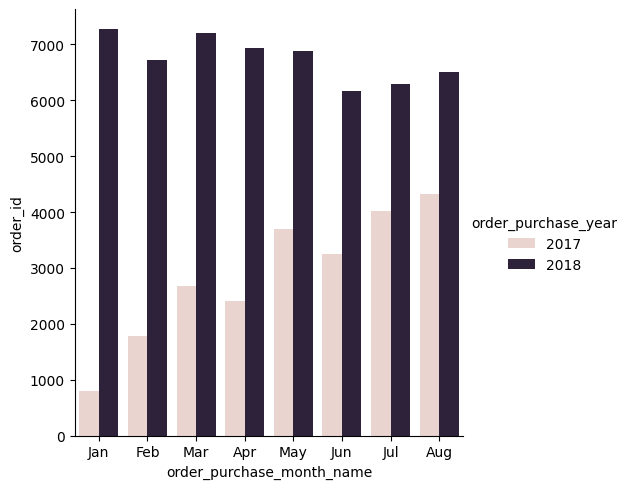

In [21]:
sns.catplot(data = groupbar_2017_2018, x = 'order_purchase_month_name', y = 'order_id', hue = 'order_purchase_year', kind = 'bar');


In [22]:
plt.figure(figsize = (10, 5))
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = 'number',
    value = number_of_orders_2017,
    title = 'Order registered in 2017 between January and August'
                        ))
fig.show();

<Figure size 1000x500 with 0 Axes>

In [23]:
plt.figure(figsize = (10, 5))
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = 'number+delta',
    value = number_of_orders_2018,
    title = 'Order registered in 2018 between January and August',
    delta = {'reference' : number_of_orders_2017, 'relative' : True}
))
fig.show();

<Figure size 1000x500 with 0 Axes>

- The number of orders placed in 2017 (from February to August) was about 22.97 thousand orders. 
- The number of orders placed in 2018 (from February to August) was about 54 thousand orders, an increase of 135% compared to 2017.

#### II. Overview

##### Customers' order by state

In [24]:
orders_by_state = customer_order.groupby(['customer_state'])['order_id'].count().reset_index().sort_values('order_id', ascending = False)
orders_by_state.head()

,customer_state,order_id
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


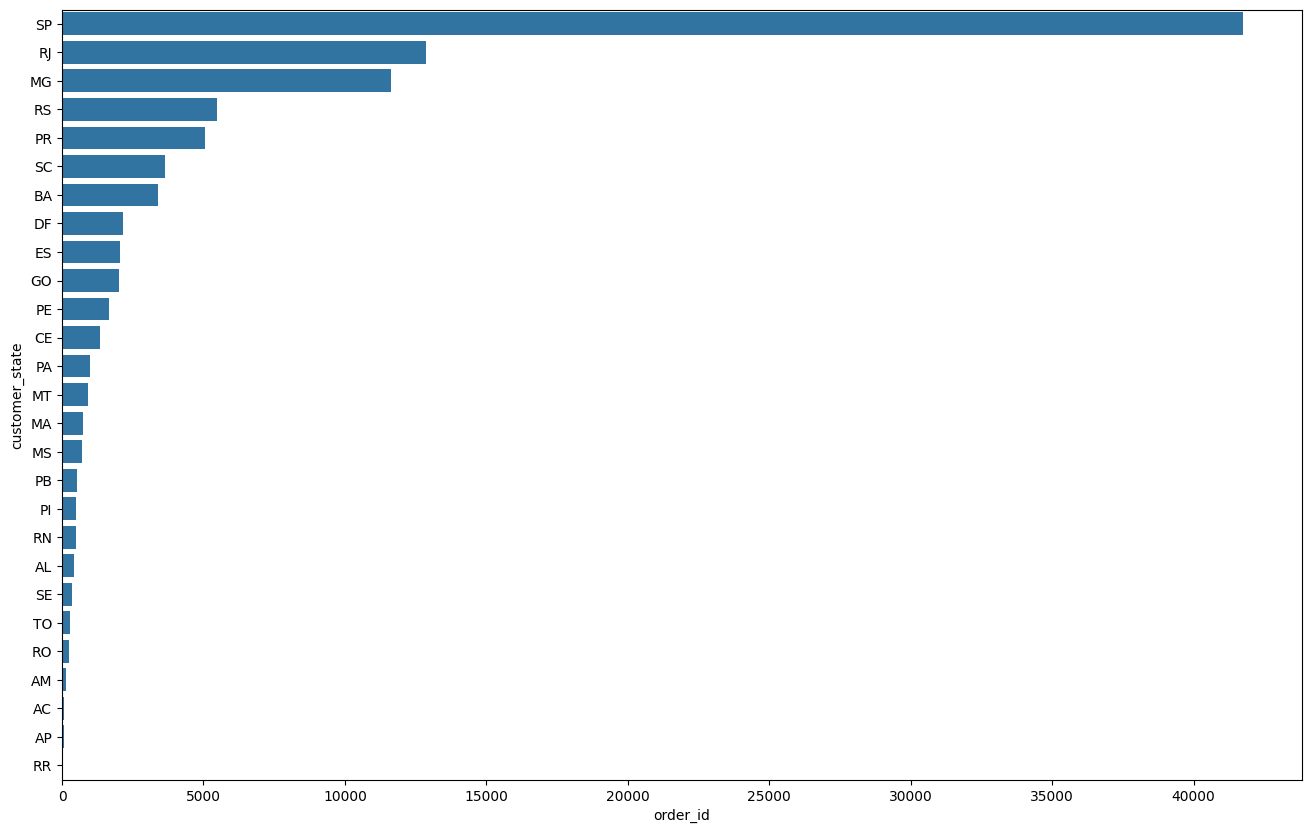

In [25]:
plt.figure(figsize = (16, 10))
sns.barplot(data = orders_by_state, x = 'order_id', y = 'customer_state');

Consumers are concentrated in regions such as SP, RJ, MG. Among them, SP has the highest number of orders, with 41746.

#### III. E-Commerce Impact on Economy

In [26]:
# Combine customer_order dataset with order_items
rev = customer_order.merge(order_items)
# Calculate freight value per month
fvalue_per_month = rev.groupby(['order_purchase_year_month', 'order_purchase_year', 'order_purchase_month_name'])['freight_value'].sum().reset_index()
fvalue_2017 = fvalue_per_month[(fvalue_per_month['order_purchase_year_month'] > 201612) & (fvalue_per_month['order_purchase_year_month'] < 201709)].reset_index()
fvalue_2018 = fvalue_per_month[(fvalue_per_month['order_purchase_year_month'] > 201712) & (fvalue_per_month['order_purchase_year_month'] < 201809)].reset_index()
fvalue_per_month = fvalue_2017.append(fvalue_2018)
fvalue_per_month.head()

,index,order_purchase_year_month,order_purchase_year,order_purchase_month_name,freight_value
0,3,201701,2017,Jan,16875.62
1,4,201702,2017,Feb,38977.60
2,5,201703,2017,Mar,57704.29
3,6,201704,2017,Apr,52495.01
4,7,201705,2017,May,80119.81


In [27]:
# Calculate rev per month
rev_per_month = rev.groupby(['order_purchase_year_month', 'order_purchase_year', 'order_purchase_month_name'])['price'].sum().reset_index()
rev_2017 = rev_per_month[(rev_per_month['order_purchase_year_month'] > 201612) & (rev_per_month['order_purchase_year_month'] < 201709)].reset_index()
rev_2018 = rev_per_month[(rev_per_month['order_purchase_year_month'] > 201712) & (rev_per_month['order_purchase_year_month'] < 201809)].reset_index()
rev_per_month = rev_2017.append(rev_2018)
rev_per_month.head()

,index,order_purchase_year_month,order_purchase_year,order_purchase_month_name,price
0,3,201701,2017,Jan,120312.87
1,4,201702,2017,Feb,247303.02
2,5,201703,2017,Mar,374344.30
3,6,201704,2017,Apr,359927.23
4,7,201705,2017,May,506071.14


In [28]:
rev_orders_per_month = rev_per_month.merge(order_year_month)
rev_orders_per_month = rev_orders_per_month.drop_duplicates()
rev_orders_per_month.head()

,index,order_purchase_year_month,order_purchase_year,order_purchase_month_name,price,order_id
0,3,201701,2017,Jan,120312.87,800
1,4,201702,2017,Feb,247303.02,1780
2,5,201703,2017,Mar,374344.30,2682
3,6,201704,2017,Apr,359927.23,2404
4,7,201705,2017,May,506071.14,3700


In [29]:
plot_line_bar = [
    go.Bar(
        x=rev_orders_per_month['order_purchase_year_month'],
        y=rev_orders_per_month['order_id'],
        name = 'Total Orders'
    ),
    go.Scatter(
        x=rev_orders_per_month['order_purchase_year_month'],
        y=rev_orders_per_month['price'],
        name = 'Total Amount'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Total Orders and Total Amount Sold'
    )
fig = go.Figure(data=plot_line_bar, layout=plot_layout)
pyoff.iplot(fig)

#### Compare revenue in 2017 with revenue in 2018

<Figure size 1000x500 with 0 Axes>

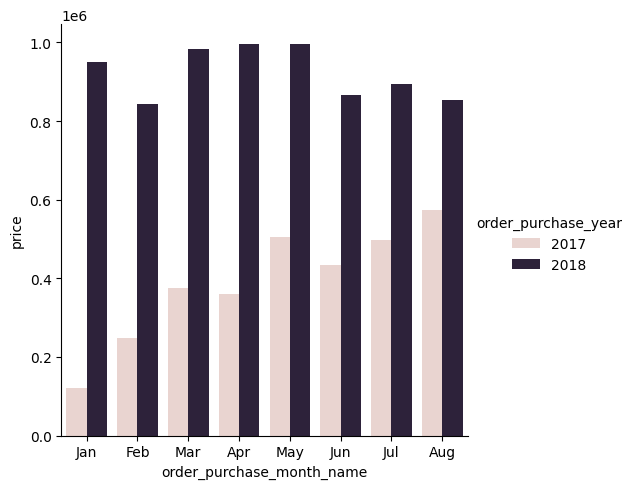

In [30]:
plt.figure(figsize = (10, 5))
sns.catplot(data = rev_per_month, x = 'order_purchase_month_name', y = 'price', hue = 'order_purchase_year', kind = 'bar');

In [31]:
rev_2017 = rev_2017['price'].sum()
rev_2018 = rev_2018['price'].sum()

In [32]:
plt.figure(figsize = (10, 5))
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = 'number',
    value = rev_2017,
    title = 'Total amount sold in 2017 between January and August'
                        ))
fig.show();

<Figure size 1000x500 with 0 Axes>

In [33]:
plt.figure(figsize = (10, 5))
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = 'number+delta',
    value = rev_2018,
    title = 'Total amount sold in 2018 between January and August',
    delta = {'reference' : rev_2017, 'relative' : True}
))
fig.show();

<Figure size 1000x500 with 0 Axes>

- Doanh thu từ việc bán hàng trục tuyến năm 2017 (tính từ thàng 1 đến tháng 8) là khoảng R$ 3.11M.
- Doanh thu từ việc bán hàng trục tuyến năm 2017 (tính từ thàng 1 đến tháng 8) là khoảng R$ 7.39M, tăng 137% so với năm 2017.

In [34]:
def mean_sum_analysis(df, group_col, value_col, orient='vertical', palette='plasma', figsize=(15, 6)):

    # Grouping data
    df_mean = df.groupby(group_col, as_index=False).mean()
    df_sum = df.groupby(group_col, as_index=False).sum()

    # Sorting grouped dataframes
    df_mean.sort_values(by=value_col, ascending=False, inplace=True)
    sorter = list(df_mean[group_col].values)
    sorter_idx = dict(zip(sorter, range(len(sorter))))
    df_sum['mean_rank'] = df_mean[group_col].map(sorter_idx)
    df_sum.sort_values(by='mean_rank', inplace=True)
    df_sum.drop('mean_rank', axis=1, inplace=True)

    # Plotting data
    fig, axs = plt.subplots(ncols=2, figsize=figsize)
    if orient == 'vertical':
        sns.barplot(x=value_col, y=group_col, data=df_mean, ax=axs[0], palette=palette)
        sns.barplot(x=value_col, y=group_col, data=df_sum, ax=axs[1], palette=palette)

    elif orient == 'horizontal':
        sns.barplot(x=group_col, y=value_col, data=df_mean, ax=axs[0], palette=palette)
        sns.barplot(x=group_col, y=value_col, data=df_sum, ax=axs[1], palette=palette)

    # Customizing plot
    for ax in axs:
        ax.set_ylabel('')
    axs[0].set_title(f'Mean of {value_col} by {group_col}', size=14, color='dimgrey')
    axs[1].set_title(f'Sum of {value_col} by {group_col}', size=14, color='dimgrey')

    plt.tight_layout()
    plt.show()
    return mean_sum_analysis

In [35]:
rev_per_state = rev.groupby(['customer_state','order_id'])['price'].sum().reset_index()
rev_per_state.head()

,customer_state,order_id,price
0,AC,088217fa841fd3da3004a1a7e1d525f8,148.00
1,AC,0b7cb1c7ea62d95ba39702f4ae850108,74.99
2,AC,0b8315fe345e3639eb0a1a2d6e122d36,159.99
3,AC,0c956783114b7ac9633e16c494c191ce,88.34
4,AC,0d4628fecf8a76472ac1da3ebef92072,239.00


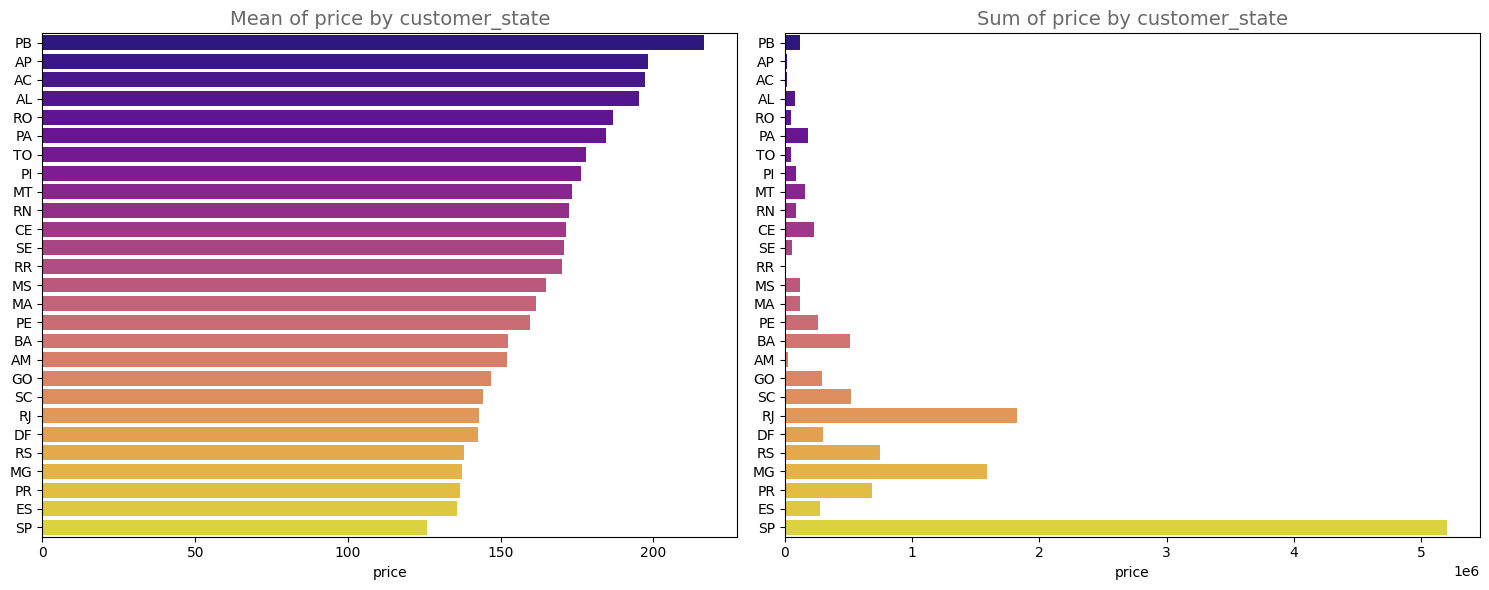

In [36]:
mean_sum_analysis(rev_per_state, group_col='customer_state', value_col='price');

##### Freight value paid by customers

<Figure size 1000x500 with 0 Axes>

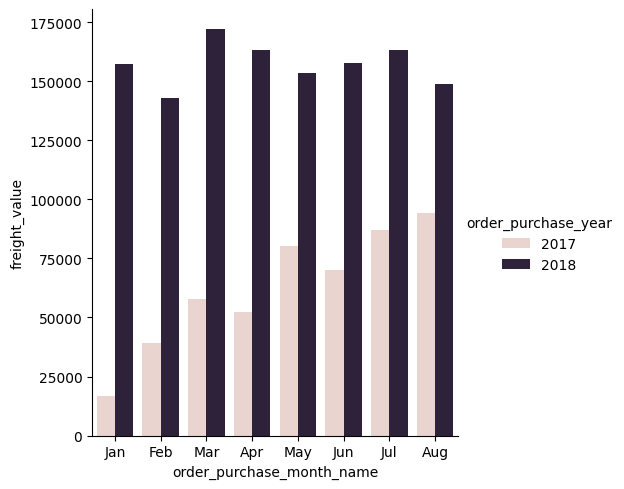

In [37]:
plt.figure(figsize = (10, 5))
sns.catplot(data = fvalue_per_month, x = 'order_purchase_month_name', y = 'freight_value', hue = 'order_purchase_year', kind = 'bar');

In [38]:
fvalue_per_state = rev.groupby(['customer_state','order_id'])['freight_value'].sum().reset_index()
fvalue_per_state.head()

,customer_state,order_id,freight_value
0,AC,088217fa841fd3da3004a1a7e1d525f8,38.83
1,AC,0b7cb1c7ea62d95ba39702f4ae850108,27.58
2,AC,0b8315fe345e3639eb0a1a2d6e122d36,27.97
3,AC,0c956783114b7ac9633e16c494c191ce,52.98
4,AC,0d4628fecf8a76472ac1da3ebef92072,77.19


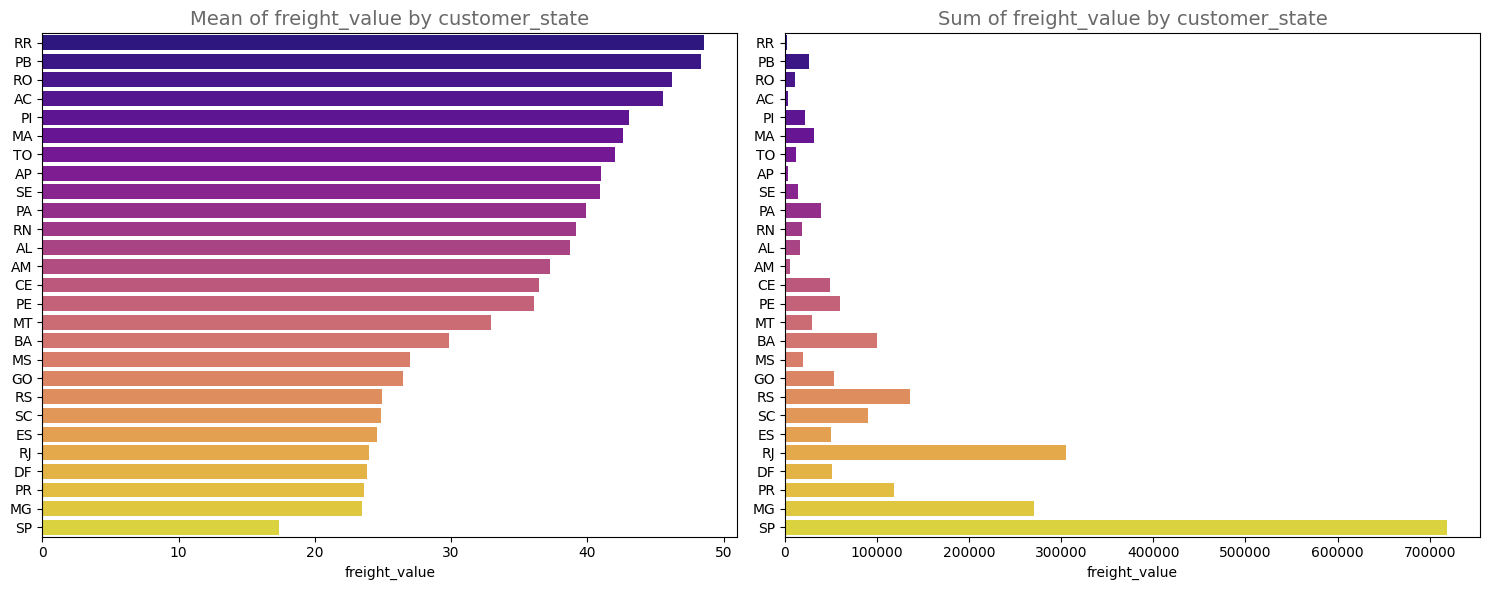

In [39]:
mean_sum_analysis(fvalue_per_state, group_col='customer_state', value_col='freight_value');

Customers in RR, PB, RO and AC normaly pays more than anyone on freights.

In [40]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))

        return '{p:.1f}%\n({v:d})'.format(p=pct, v=val)

    return my_autopct

def donut_plot(df, col, ax, label_names=None, text='', colors=['crimson', 'navy'], circle_radius=0.8,
            title=f'Gráfico de Rosca', flag_ruido=0):

    values = df[col].value_counts().values
    if label_names is None:
        label_names = df[col].value_counts().index

    if flag_ruido > 0:
        values = values[:-flag_ruido]
        label_names = label_names[:-flag_ruido]
        
    center_circle = plt.Circle((0, 0), circle_radius, color='white')
    ax.pie(values, labels=label_names, colors=colors, autopct=make_autopct(values))
    ax.add_artist(center_circle)

    kwargs = dict(size=30, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    ax.set_title(title, size=30, color='dimgrey')
    return donut_plot

<function __main__.donut_plot(df, col, ax, label_names=None, text='', colors=['crimson', 'navy'], circle_radius=0.8, title='Gráfico de Rosca', flag_ruido=0)>

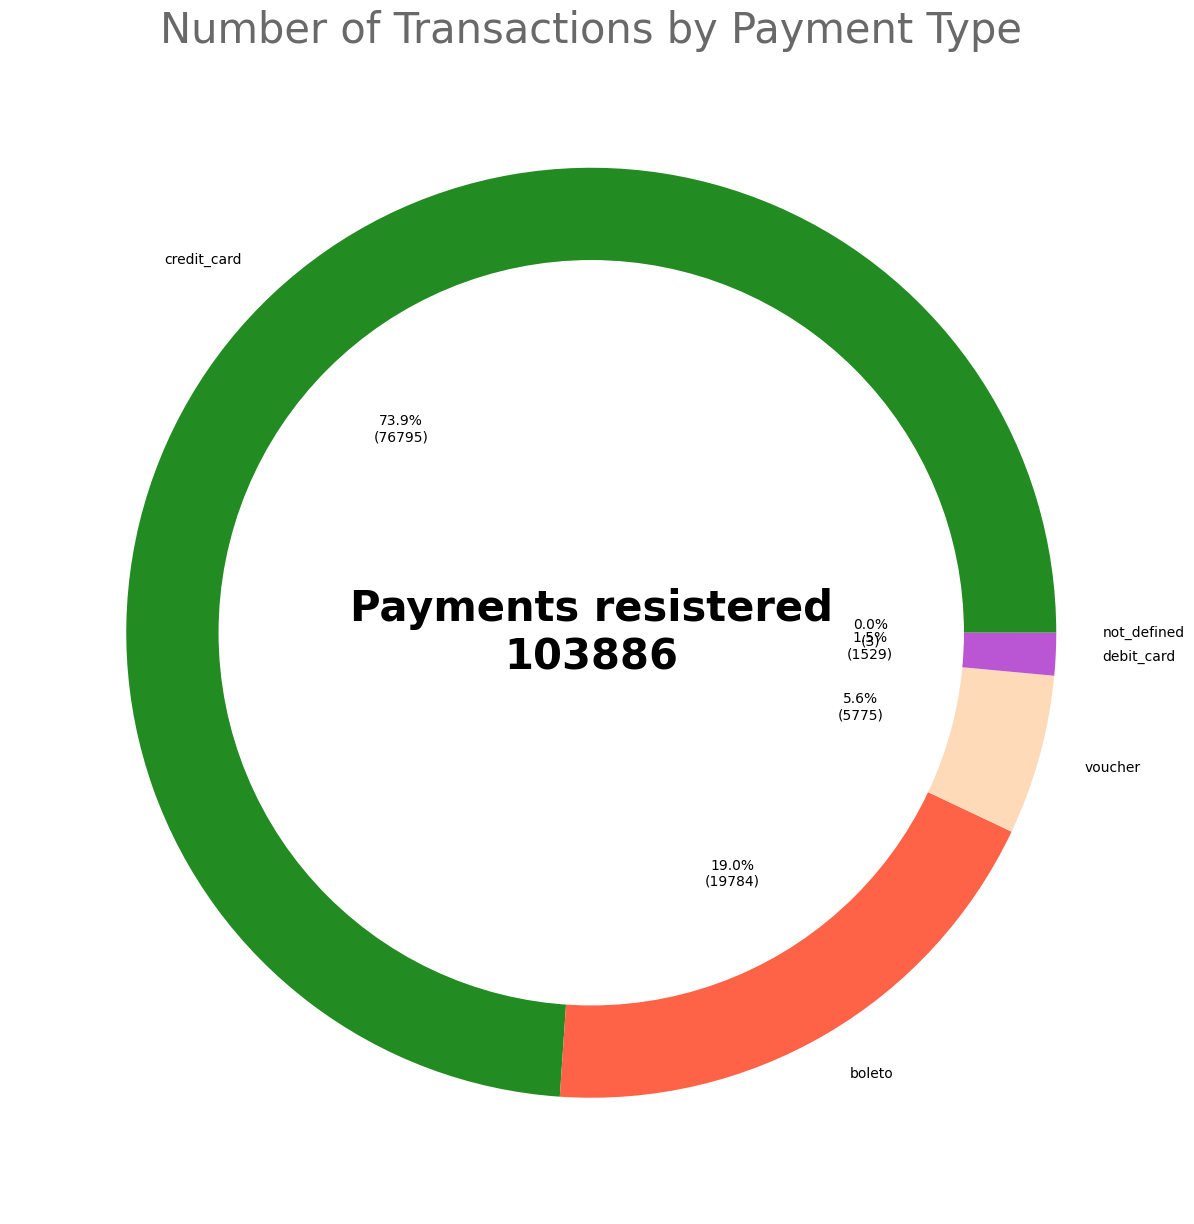

In [41]:
fig, ax = plt.subplots(figsize=(15, 20))
label_names = ['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined']
text = f'Payments resistered\n{len(order_payments)}'
color_list = ['forestgreen', 'tomato', 'peachpuff', 'mediumorchid', 'aliceblue']
title = 'Number of Transactions by Payment Type'

# Visualizing it through a donut chart
donut_plot(order_payments, col='payment_type', ax=ax, label_names=label_names, colors=color_list, title=title, text=text)

Tổng số lượng giao dịch đã được thực hiện là 103886 giao dịch.
Hình thức chi trả bằng thẻ tín dụng được người tiêu dùng sử dụng phổ biến nhất với 73.9%. Ngoài ra, người tiêu dùng cũng sử dụng boleto là hình thức thanh toán hóa đơn của họ với tỉ lệ là 19%. Một số lượng nhỏ người tiêu dùng (5.6%) sử dụng voucher. 
Xu hướng trả trước tiền hàng là do một số lợi ích mà nó mang lại như tiện lợi, giúp việc chi tiêu trở nên dễ dàng và linh hoạt hơn. Ngoài ra, khi thanh toán trước, người tiêu dùng thường sẽ được nhận một số chương trình ưu đãi đến từ nhà cung cấp (Hoàn tiền, tích điểm, tặng voucher, giảm giá,...) nhằm khuyến khích khách hàng sử dụng dịch vụ thanh toán trước.

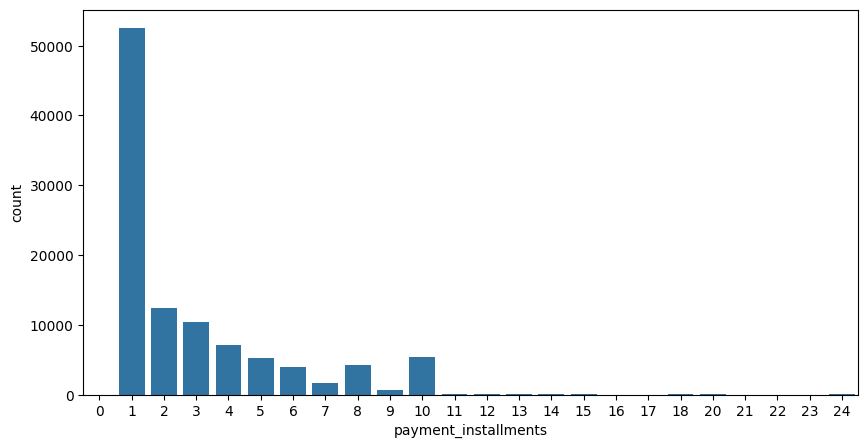

In [42]:
plt.figure(figsize = (10, 5))
sns.countplot(data = order_payments, x = 'payment_installments');

On the bar chart above, we can see how brazilian customers prefer to pay the orders: mostly of them pay once into 1 installment and it's worth to point out the quantity of payments done by 10 installments.

In [46]:
payment_type = rev.merge(order_payments)
payment_type = payment_type.groupby(['order_purchase_year_month', 'payment_type'])['order_id'].count().reset_index()
pay_2017 = payment_type[(payment_type['order_purchase_year_month'] > 201612) & (payment_type['order_purchase_year_month'] < 201709)].reset_index()
pay_2018 = payment_type[(payment_type['order_purchase_year_month'] > 201712) & (payment_type['order_purchase_year_month'] < 201809)].reset_index()
payment_type = pay_2017.append(pay_2018)
payment_type.head()

,index,order_purchase_year_month,payment_type,order_id
0,6,201701,boleto,232
1,7,201701,credit_card,695
2,8,201701,debit_card,10
3,9,201701,voucher,68
4,10,201702,boleto,438


In [47]:
plt.figure(figsize = (10, 5))
line_plot = [
    go.Scatter(
        x=payment_type.query("payment_type == 'boleto'")['order_purchase_year_month'],
        y=payment_type.query("payment_type == 'boleto'")['order_id'],
        name = 'Boleto'
    ),
    go.Scatter(
        x=payment_type.query("payment_type == 'credit_card'")['order_purchase_year_month'],
        y=payment_type.query("payment_type == 'credit_card'")['order_id'],
        name = 'Credit Card'
    ),
    go.Scatter(
        x=payment_type.query("payment_type == 'debit_card'")['order_purchase_year_month'],
        y=payment_type.query("payment_type == 'debit_card'")['order_id'],
        name = 'Debit Card'
    ),
    go.Scatter(
        x=payment_type.query("payment_type == 'voucher'")['order_purchase_year_month'],
        y=payment_type.query("payment_type == 'voucher'")['order_id'],
        name = 'Voucher'
    ),
    go.Scatter(
        x=payment_type.query("payment_type == 'not_defined'")['order_purchase_year_month'],
        y=payment_type.query("payment_type == 'not_defined'")['order_id'],
        name = 'Not Defined'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Evolution of Payment Types'
    )
fig = go.Figure(data=line_plot, layout=plot_layout)
pyoff.iplot(fig);

<Figure size 1000x500 with 0 Axes>

Through the line chart above, we can see that credit card payment occupies a very important position in e-commerce activities in Brazil. Besides, from March 2018 we can see a slight decrease in this type of payment. Then from May 2018, credit card payments continued to increase again.

In order to fully utilize this trend, improve competitiveness and operational efficiency, enterprises need to focus on establishing a strong business operation foundation and formulating strategies for applying digital technology to support the successful implementation of e-commerce.